In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import flatten, udf, col
from pyspark.sql.types import BooleanType
bucket = 'diabetesbucket'
spark = SparkSession.builder\
    .appName("adbms_project_diabetes")\
    .config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-latest.jar")\
    .getOrCreate()

dataFrame = spark.read \
    .format("bigquery") \
    .load('citric-pager-385519.diabates_dataset.orig')
dataFrame.show(10)

+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|         0.0|   0.0|     0.0|      1.0|13.0|   0.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    2.0|     0.0|     0.0|     0.0|1.0|2.0|      6.0|   4.0|
|         0.0|   0.0|     0.0|      1.0|14.0|   0.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          0.0|        

In [4]:
dataFrame.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [5]:
Data = dataFrame

In [6]:
from pyspark.sql.types import IntegerType,FloatType
Data2 = Data.withColumn("Diabetes_012", Data["Diabetes_012"].cast(IntegerType()))\
            .withColumn("HighBP", Data["HighBP"].cast(IntegerType()))\
            .withColumn("HighChol", Data["HighChol"].cast(IntegerType()))\
            .withColumn("CholCheck", Data["CholCheck"].cast(IntegerType()))\
            .withColumn("BMI", Data["BMI"].cast(IntegerType()))\
            .withColumn("Smoker", Data["Smoker"].cast(IntegerType()))\
            .withColumn("Stroke", Data["Stroke"].cast(IntegerType()))\
            .withColumn("HeartDiseaseorAttack", Data["HeartDiseaseorAttack"].cast(IntegerType()))\
            .withColumn("PhysActivity", Data["PhysActivity"].cast(IntegerType()))\
            .withColumn("Fruits", Data["Fruits"].cast(IntegerType()))\
            .withColumn("Veggies", Data["Veggies"].cast(IntegerType()))\
            .withColumn("HvyAlcoholConsump", Data["HvyAlcoholConsump"].cast(IntegerType()))\
            .withColumn("NoDocbcCost", Data["NoDocbcCost"].cast(IntegerType()))\
            .withColumn("GenHlth", Data["GenHlth"].cast(IntegerType()))\
            .withColumn("MentHlth", Data["MentHlth"].cast(IntegerType()))\
            .withColumn("PhysHlth", Data["PhysHlth"].cast(IntegerType()))\
            .withColumn("DiffWalk", Data["DiffWalk"].cast(IntegerType()))\
            .withColumn("Sex", Data["Sex"].cast(IntegerType()))\
            .withColumn("Age", Data["Age"].cast(IntegerType()))\
            .withColumn("Education", Data["Education"].cast(IntegerType()))\
            .withColumn("Income", Data["Income"].cast(IntegerType()))

In [7]:
c.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



In [8]:
# dataFrame2 = Data2.drop('Income','Education','NoDocbcCost','AnyHealthcare')

In [9]:
Data2.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



In [28]:
# dataFrame2.toPandas()

In [10]:
# categorical columns - I roughly grouped them 
cat_socialecom = ['Age', 'Sex']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

In [11]:
PandasDF = Data2.toPandas()

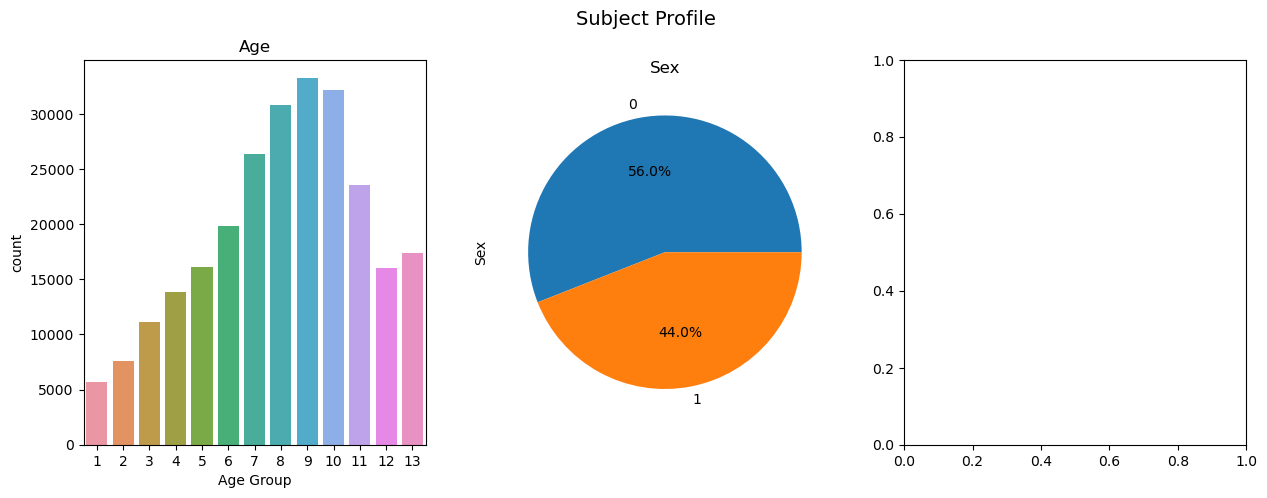

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=PandasDF, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex']):
    PandasDF[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

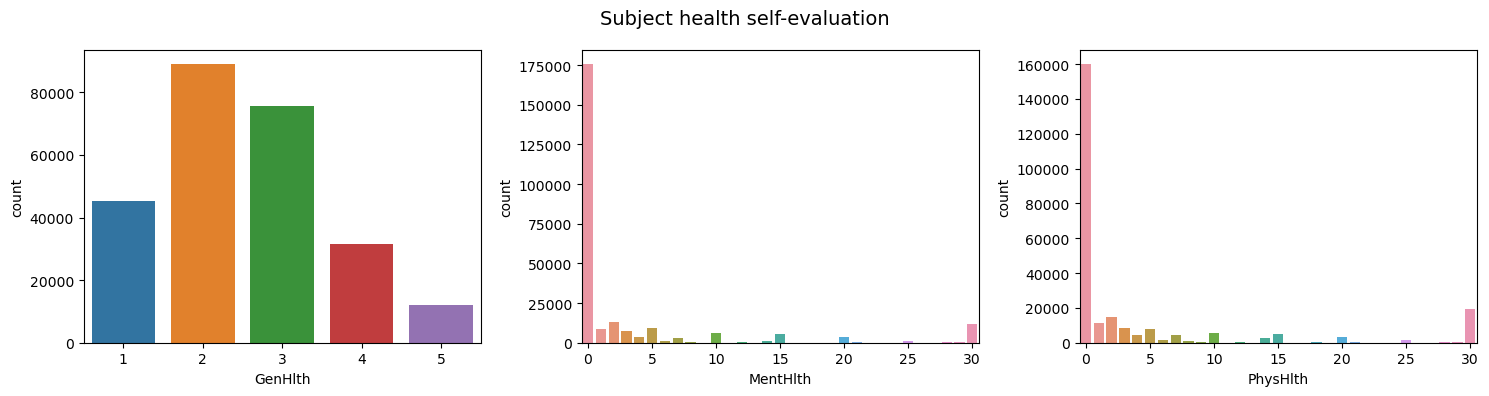

In [18]:
# how do they evaluate their health? plot distribution 
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=PandasDF, ax=axes[i])
    if len(PandasDF[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(PandasDF[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

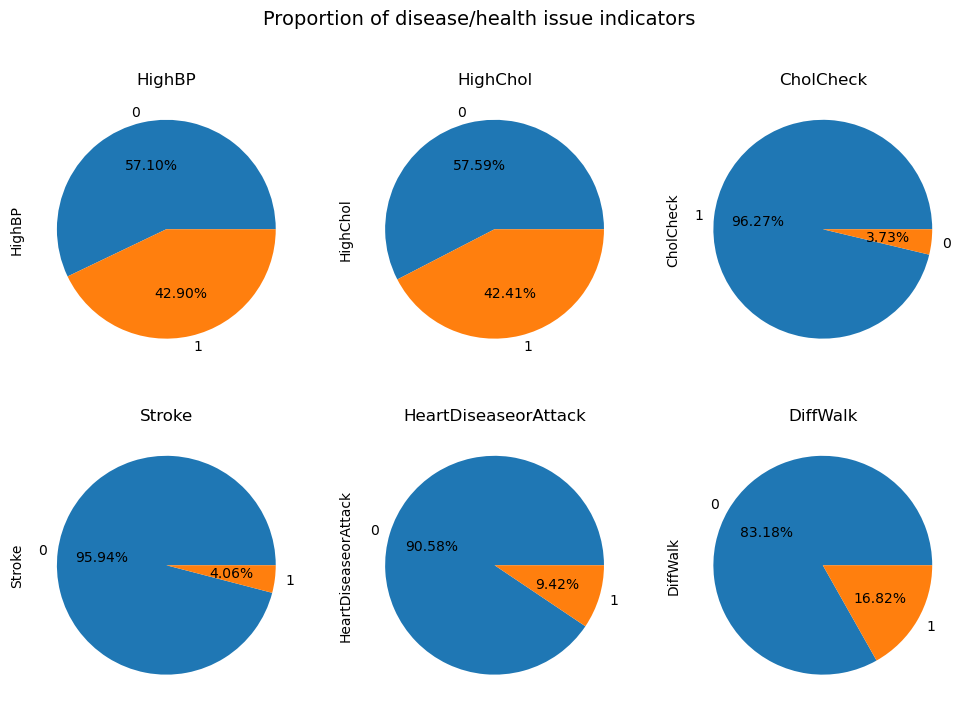

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    PandasDF[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()

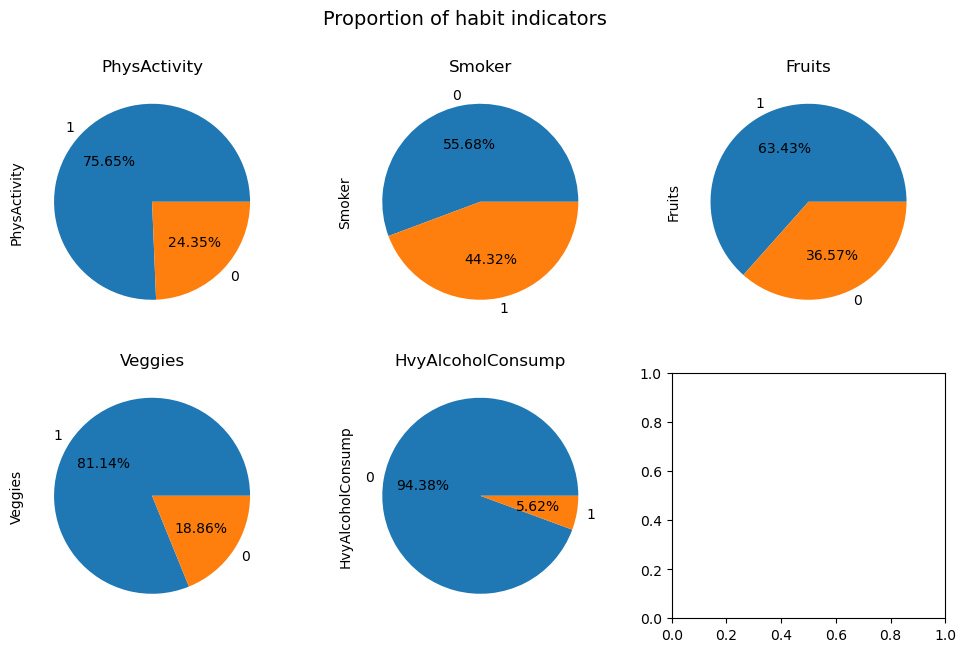

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
for i, col in enumerate(cat_habit):
    PandasDF[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

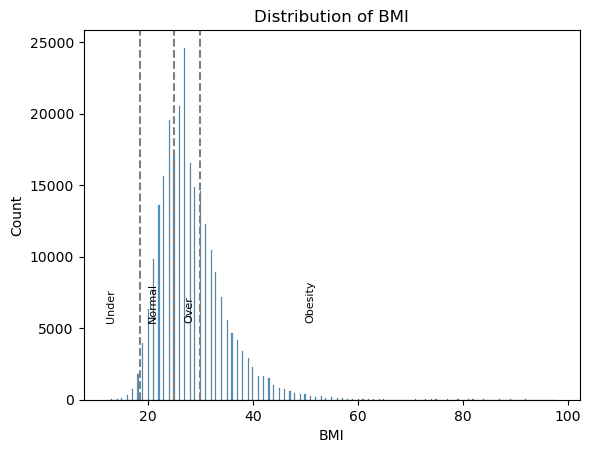

In [22]:
 #plot the distribution of BMI  

# The World Health Organization (WHO) defines the following BMI ranges for adults:

# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(PandasDF['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

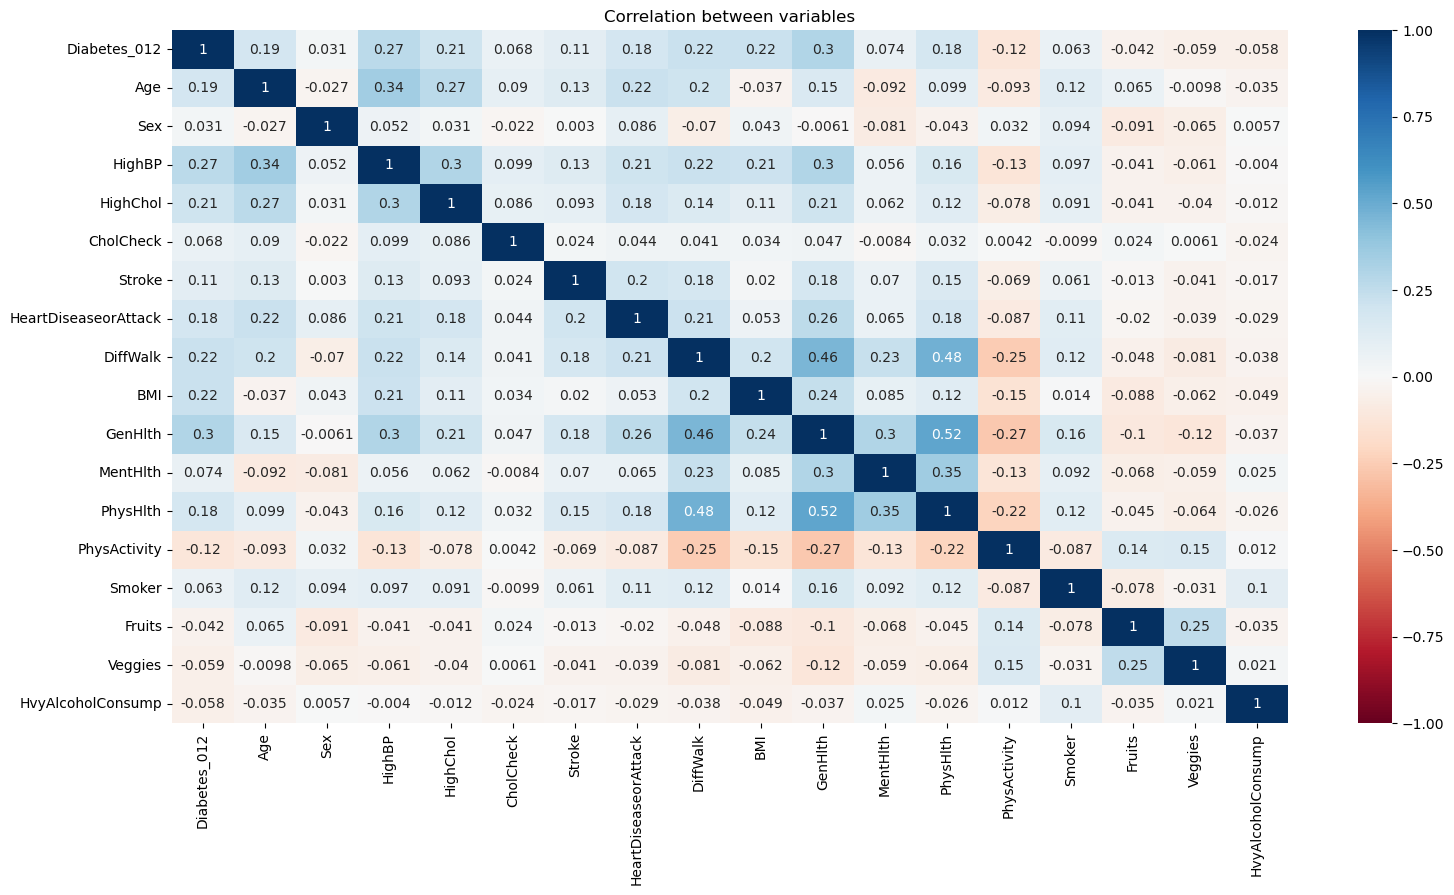

In [24]:
# plot a heatmap to check the correlation between the variables

# for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_012'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(PandasDF[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [26]:
PandasDF.corr()['Diabetes_012'].abs().sort_values(ascending=False).head(15)

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Income                  0.171483
Education               0.130517
PhysActivity            0.121947
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Name: Diabetes_012, dtype: float64